In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("全部歌曲.csv")
df

,year,language,artist_name,track_name,track_id,album_name,popularity,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration(s),time_signature,label
0,2021,華語,告五人,在這座城市遺失了你 (戲劇《他們創業的那些鳥事》插曲),1Ytgo9ipdlTsf6wlg6sXf3,運氣來得若有似無,60,0.460,0.297,9.0,...,1.0,0.0309,0.6920,0.000318,0.1070,0.125,180.095,357.094,4.0,1
1,2021,華語,程響,四季予你,4BGkSCrjiLao1bpibNptTD,四季予你,59,0.534,0.595,3.0,...,1.0,0.0330,0.7500,0.000000,0.1160,0.187,141.957,248.527,4.0,1
2,2021,華語,Eric Chou,如果能幸福 - HBO Asia原創影集《戒指流浪記》片尾曲,0TVrlU8El0K6U1pC2LOt09,如果能幸福 (HBO Asia原創影集《戒指流浪記》片尾曲),55,0.480,0.358,0.0,...,1.0,0.0282,0.6220,0.000021,0.1070,0.142,149.945,259.588,4.0,1
3,2021,華語,WeiBird,"如果可以 - 電影""月老""主題曲",72OVnXDzugvrCU25lMi9au,"如果可以 (電影""月老""主題曲)",71,0.540,0.540,3.0,...,1.0,0.0290,0.2410,0.000000,0.3510,0.372,74.969,274.400,4.0,1
4,2021,華語,告五人,唯一 (三立/台視戲劇《戀愛是科學》插曲),19fp9nI0tq0lcBl7XoCHAb,運氣來得若有似無,62,0.485,0.103,1.0,...,1.0,0.0367,0.9590,0.000053,0.1070,0.210,140.595,270.761,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7856,2010,西洋,Prophetess Helen Nkume,Adam Olee Ebe Ino ?,3HF2QQOZC4MHRuMQA8MyrM,Adam Olee Ebe Ino ?,6,0.774,0.860,10.0,...,0.0,0.1730,0.1630,0.001000,0.0605,0.760,100.102,805.280,4.0,0
7857,2010,日語,Sunday 2PM,돌연변이,6WmL0e1FXxUjpwZKMThrVP,돌연변이,0,0.633,0.914,1.0,...,1.0,0.2560,0.0667,0.000000,0.2990,0.769,107.300,185.222,4.0,0
7858,2010,日語,Sunday 2PM,어떻게,6FR2t0ytRuak9p5bcZJTGQ,돌연변이,0,0.657,0.822,11.0,...,0.0,0.2320,0.0856,0.000000,0.0791,0.563,95.941,226.548,4.0,0
7859,2010,日語,Sunday 2PM,기도,3fIER6IBdl7GnQrZNFuoiE,돌연변이,0,0.385,0.856,11.0,...,0.0,0.2340,0.2410,0.000000,0.3650,0.519,86.628,291.070,5.0,0


In [73]:
# 檢查缺失值
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              7861 non-null   int64  
 1   language          7861 non-null   object 
 2   artist_name       7861 non-null   object 
 3   track_name        7861 non-null   object 
 4   track_id          7861 non-null   object 
 5   album_name        7861 non-null   object 
 6   popularity        7861 non-null   int64  
 7   danceability      7861 non-null   float64
 8   energy            7861 non-null   float64
 9   key               7861 non-null   float64
 10  loudness          7861 non-null   float64
 11  mode              7861 non-null   float64
 12  speechiness       7861 non-null   float64
 13  acousticness      7861 non-null   float64
 14  instrumentalness  7861 non-null   float64
 15  liveness          7861 non-null   float64
 16  valence           7861 non-null   float64


In [74]:
df_train = df[df['year'] != 2021]
df_predict = df[df['year'] == 2021]

In [75]:
X = df_train.drop(['year', 'language', 'artist_name', 'track_name', 'track_id', 'album_name', 'popularity', 'label'], axis = 1)
y = df_train['label']

In [76]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, f1_score, auc, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
def Logistic_training_validation(c, threshold, train_X, train_y, valid_X, valid_y):
    
    # 用訓練資料建構 Logistic regression 模型
    glm = LogisticRegression(C = c)
    glm.fit(train_X, train_y)

    # 做預測
    estimated_prob = glm.predict_proba(valid_X)[:,1] 
    
    # 手動產生預測結果
    predicted_y = []
    for p in estimated_prob:
        if p >= threshold:
            predicted_y.append(1)
        else:
            predicted_y.append(0)

    # 用驗證資料建構 confusion matrix
    cm = metrics.confusion_matrix(valid_y, predicted_y)

    # 預測成效
    accuracy = round(metrics.accuracy_score(valid_y, predicted_y), 3)
    precision = round(metrics.precision_score(valid_y, predicted_y), 3)
    recall = round(metrics.recall_score(valid_y, predicted_y), 3)
    f1_score = round(metrics.f1_score(valid_y, predicted_y), 3)

    return glm, cm, [accuracy, precision, recall, f1_score], estimated_prob

In [79]:
glm = LogisticRegression()
glm.fit(train_X, train_y)
predicted_y = glm.predict(valid_X)
cm = metrics.confusion_matrix(valid_y, predicted_y)
print("                    true positive  true negative")
print("predicted positive:            ", cm[1][1], "            ", cm[0][1])
print("predicted negative:            ", cm[1][0], "            ", cm[0][0])
accuracy = metrics.accuracy_score(valid_y, predicted_y)
print("accuracy =", accuracy)
precision = metrics.precision_score(valid_y, predicted_y)
print("precision =", precision)
recall = metrics.recall_score(valid_y, predicted_y)
print("recall =", recall)
f1_score = metrics.f1_score(valid_y, predicted_y)
print("F1 score =", f1_score)

                    true positive  true negative
predicted positive:             663              357
predicted negative:             124              322
accuracy = 0.6718963165075034
precision = 0.65
recall = 0.8424396442185514
F1 score = 0.7338129496402878


In [80]:
# 找最佳的 C 和 threshold
print("=========== try several regularization penalties ============")
Cs = [0.01, 0.1, 1, 10, 100]
print("Cs =", Cs)
thresholds = [t / 100 for t in list(range(20, 71, 5))]
print("thresholds =", thresholds)

max_f1 = 0
best_c = 0
best_threshold = 0
for c in Cs:
    for threshold in thresholds:
        glm_object, cm, scores, estimated_prob = Logistic_training_validation(c, threshold, train_X, train_y, valid_X, valid_y)
        f1 = scores[3]
        if f1 > max_f1:
            max_f1 = f1
            best_c = c
            best_threshold = threshold
print("=========== end ============\n")

# 用最佳的 C 和最佳的 threshold 跑一次
print("=========== a test starts ============")
glm_object, cm, scores, estimated_prob = training_validation(best_c, best_threshold, train_X, train_y, valid_X, valid_y)
print("C =", best_c, ", threshold =", best_threshold)
print("                    true positive  true negative")
print("predicted positive:            ", cm[1][1], "            ", cm[0][1])
print("predicted negative:            ", cm[1][0], "            ", cm[0][0])
print("accuracy =", scores[0])
print("precision =", scores[1])
print("recall =", scores[2])
print("F1 score =", scores[3])
print("=========== a test ends ============")

=========== try several regularization penalties ============
Cs = [0.01, 0.1, 1, 10, 100]
thresholds = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
=========== end ============

=========== a test starts ============
C = 1 , threshold = 0.35
                    true positive  true negative
predicted positive:             763              464
predicted negative:             24              215
accuracy = 0.667
precision = 0.622
recall = 0.97
F1 score = 0.758
=========== a test ends ============


## Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
def RF_training_validation(d, threshold, train_X, train_y, valid_X, valid_y):
    
    # 用訓練資料建構 Random Forest 模型
    glm = RandomForestClassifier(n_estimators = 100, oob_score = True, max_depth = d)
    glm.fit(train_X, train_y)

    # 做預測
    estimated_prob = glm.predict_proba(valid_X)[:,1] 
    
    # 手動產生預測結果
    predicted_y = []
    for p in estimated_prob:
        if p >= threshold:
            predicted_y.append(1)
        else:
            predicted_y.append(0)

    # 用驗證資料建構 confusion matrix
    cm = metrics.confusion_matrix(valid_y, predicted_y)

    # 預測成效
    accuracy = round(metrics.accuracy_score(valid_y, predicted_y), 3)
    precision = round(metrics.precision_score(valid_y, predicted_y), 3)
    recall = round(metrics.recall_score(valid_y, predicted_y), 3)
    f1_score = round(metrics.f1_score(valid_y, predicted_y), 3)

    return glm, cm, [accuracy, precision, recall, f1_score], estimated_prob

In [50]:
glm = RandomForestClassifier(n_estimators = 100, oob_score = True)
glm.fit(train_X, train_y)
predicted_y = glm.predict(valid_X)
cm = metrics.confusion_matrix(valid_y, predicted_y)
print("                    true positive  true negative")
print("predicted positive:            ", cm[1][1], "            ", cm[0][1])
print("predicted negative:            ", cm[1][0], "            ", cm[0][0])
accuracy = metrics.accuracy_score(valid_y, predicted_y)
print("accuracy =", accuracy)
precision = metrics.precision_score(valid_y, predicted_y)
print("precision =", precision)
recall = metrics.recall_score(valid_y, predicted_y)
print("recall =", recall)
f1_score = metrics.f1_score(valid_y, predicted_y)
print("F1 score =", f1_score)

                    true positive  true negative
predicted positive:             643              278
predicted negative:             144              401
accuracy = 0.7121418826739427
precision = 0.6981541802388708
recall = 0.8170266836086404
F1 score = 0.7529274004683839


In [54]:
# 找最佳的 Max_Depths 和 threshold
print("=========== try several regularization penalties ============")
Max_Depths = [d for d in list(range(1, 11))]
print("Max_Depths =", Max_Depths)
thresholds = [t / 100 for t in list(range(20, 71, 5))]
print("thresholds =", thresholds)

max_f1 = 0
best_d = 0
best_threshold = 0
for d in Max_Depths:
    for threshold in thresholds:
        glm_object, cm, scores, estimated_prob = RF_training_validation(d, threshold, train_X, train_y, valid_X, valid_y)
        f1 = scores[3]
        if f1 > max_f1:
            max_f1 = f1
            best_d = d
            best_threshold = threshold
print("=========== end ============\n")

# 用最佳的 Max_Depths 和最佳的 threshold 跑一次
print("=========== a test starts ============")
glm_object, cm, scores, estimated_prob = training_validation(best_d, best_threshold, train_X, train_y, valid_X, valid_y)
print("max_depth =", best_d, ", threshold =", best_threshold)
print("                    true positive  true negative")
print("predicted positive:            ", cm[1][1], "            ", cm[0][1])
print("predicted negative:            ", cm[1][0], "            ", cm[0][0])
print("accuracy =", scores[0])
print("precision =", scores[1])
print("recall =", scores[2])
print("F1 score =", scores[3])
print("=========== a test ends ============")

=========== try several regularization penalties ============
Max_Depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
thresholds = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
=========== end ============

=========== a test starts ============
max_depth = 7 , threshold = 0.4
                    true positive  true negative
predicted positive:             744              436
predicted negative:             43              243
accuracy = 0.673
precision = 0.631
recall = 0.945
F1 score = 0.756
=========== a test ends ============


### XGBoost

In [57]:
import xgboost as xgb
from xgboost import XGBClassifier

In [61]:
def XGB_training_validation(a, threshold, train_X, train_y, valid_X, valid_y):
    
    # 用訓練資料建構 XGBoost 模型
    glm = XGBClassifier(n_estimators=n, learning_rate= lr,max_depth=d, eta=eta, alpha=a)
    glm.fit(train_X, train_y)

    # 做預測
    estimated_prob = glm.predict_proba(valid_X)[:,1] 
    
    # 手動產生預測結果
    predicted_y = []
    for p in estimated_prob:
        if p >= threshold:
            predicted_y.append(1)
        else:
            predicted_y.append(0)

    # 用驗證資料建構 confusion matrix
    cm = metrics.confusion_matrix(valid_y, predicted_y)

    # 預測成效
    accuracy = round(metrics.accuracy_score(valid_y, predicted_y), 3)
    precision = round(metrics.precision_score(valid_y, predicted_y), 3)
    recall = round(metrics.recall_score(valid_y, predicted_y), 3)
    f1_score = round(metrics.f1_score(valid_y, predicted_y), 3)

    return glm, cm, [accuracy, precision, recall, f1_score], estimated_prob

In [58]:
n = 100 
lr = 0.01 
d = 15 
eta = 0.3
sca = 'S'

glm = XGBClassifier(n_estimators=n, learning_rate= lr,max_depth=d, eta=eta)
glm.fit(train_X, train_y)
predicted_y = glm.predict(valid_X)
cm = metrics.confusion_matrix(valid_y, predicted_y)
print("                    true positive  true negative")
print("predicted positive:            ", cm[1][1], "            ", cm[0][1])
print("predicted negative:            ", cm[1][0], "            ", cm[0][0])
accuracy = metrics.accuracy_score(valid_y, predicted_y)
print("accuracy =", accuracy)
precision = metrics.precision_score(valid_y, predicted_y)
print("precision =", precision)
recall = metrics.recall_score(valid_y, predicted_y)
print("recall =", recall)
f1_score = metrics.f1_score(valid_y, predicted_y)
print("F1 score =", f1_score)

                    true positive  true negative
predicted positive:             650              302
predicted negative:             137              377
accuracy = 0.7005457025920873
precision = 0.6827731092436975
recall = 0.8259212198221093
F1 score = 0.747556066705003


In [81]:
# 找最佳的 Alpha 和 threshold
print("=========== try several regularization penalties ============")
Alphas = [0.01, 0.1, 1, 10, 100]
print("Alphas =", Alphas)
thresholds = [t / 100 for t in list(range(20, 71, 5))]
print("thresholds =", thresholds)

max_f1 = 0
best_a = 0
best_threshold = 0
for a in Alphas:
    for threshold in thresholds:
        glm_object, cm, scores, estimated_prob = XGB_training_validation(a, threshold, train_X, train_y, valid_X, valid_y)
        f1 = scores[3]
        if f1 > max_f1:
            max_f1 = f1
            best_a = a
            best_threshold = threshold
print("=========== end ============\n")

# 用最佳的 Alpha 和最佳的 threshold 跑一次
print("=========== a test starts ============")
glm_object, cm, scores, estimated_prob = training_validation(best_a, best_threshold, train_X, train_y, valid_X, valid_y)
print("alpha =", best_a, ", threshold =", best_threshold)
print("                    true positive  true negative")
print("predicted positive:            ", cm[1][1], "            ", cm[0][1])
print("predicted negative:            ", cm[1][0], "            ", cm[0][0])
print("accuracy =", scores[0])
print("precision =", scores[1])
print("recall =", scores[2])
print("F1 score =", scores[3])
print("=========== a test ends ============")

=========== try several regularization penalties ============
Alphas = [0.01, 0.1, 1, 10, 100]
thresholds = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
=========== end ============

=========== a test starts ============
alpha = 1 , threshold = 0.4
                    true positive  true negative
predicted positive:             743              436
predicted negative:             44              243
accuracy = 0.673
precision = 0.63
recall = 0.944
F1 score = 0.756
=========== a test ends ============


## Predict

In [63]:
X_2021 = df_predict.drop(['year', 'language', 'artist_name', 'track_name', 'track_id', 'album_name', 'popularity', 'label'], axis = 1)
y_2021 = df_predict['label']

In [65]:
glm = LogisticRegression(C = 1)
threshold = 0.35
glm.fit(X, y)

# 做預測
estimated_prob = glm.predict_proba(X_2021)[:,1] 

# 手動產生預測結果
predicted_y = []
for p in estimated_prob:
    if p >= threshold:
        predicted_y.append(1)
    else:
        predicted_y.append(0)

cm = metrics.confusion_matrix(y_2021, predicted_y)
print("                    true positive  true negative")
print("predicted positive:            ", cm[1][1], "            ", cm[0][1])
print("predicted negative:            ", cm[1][0], "            ", cm[0][0])
accuracy = metrics.accuracy_score(y_2021, predicted_y)
print("accuracy =", accuracy)
precision = metrics.precision_score(y_2021, predicted_y)
print("precision =", precision)
recall = metrics.recall_score(y_2021, predicted_y)
print("recall =", recall)
f1_score = metrics.f1_score(y_2021, predicted_y)
print("F1 score =", f1_score)

                    true positive  true negative
predicted positive:             270              193
predicted negative:             10              58
accuracy = 0.6177024482109228
precision = 0.5831533477321814
recall = 0.9642857142857143
F1 score = 0.7267833109017497


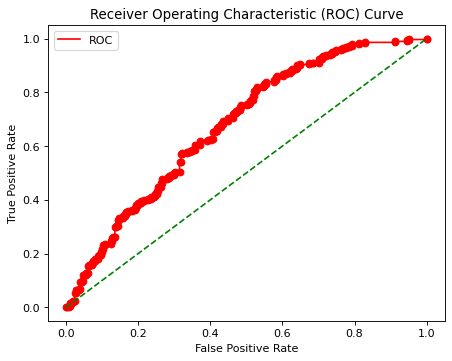

AUC = 0.6774544678429141


In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 80

# 繪製 ROC 曲線、計算 AUC
fp_rates, tp_rates, thresholds = metrics.roc_curve(y_2021, estimated_prob)

plt.plot(fp_rates, tp_rates, 'o', color = 'red')
plt.plot(fp_rates, tp_rates, color = 'red', label = 'ROC')
plt.plot([0, 1], [0, 1], color = 'green', linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.auc(fp_rates, tp_rates)
print("AUC =", auc)